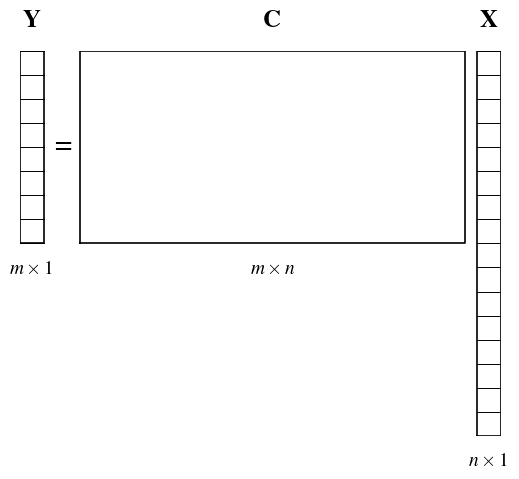

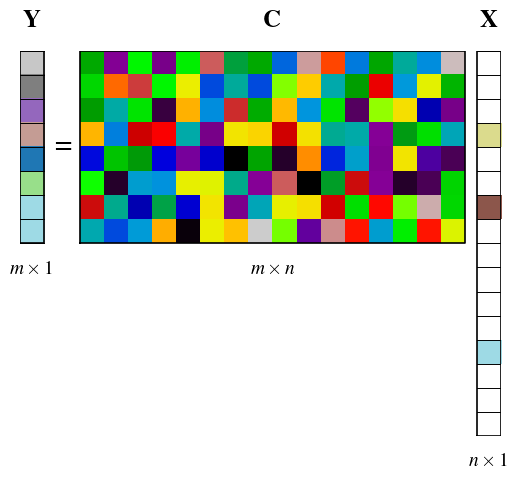

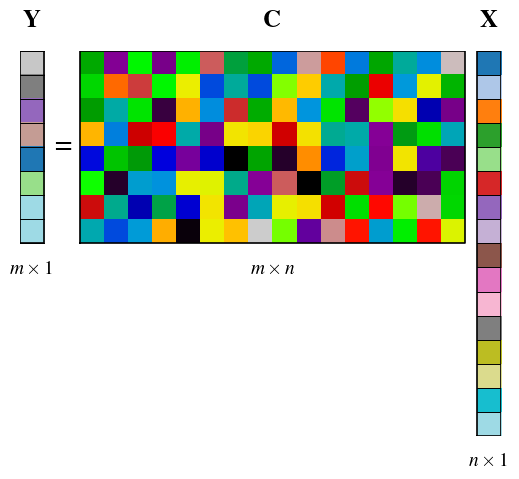

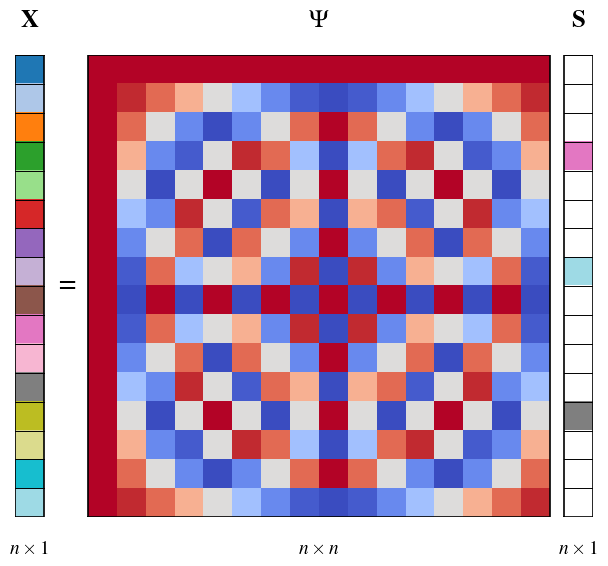

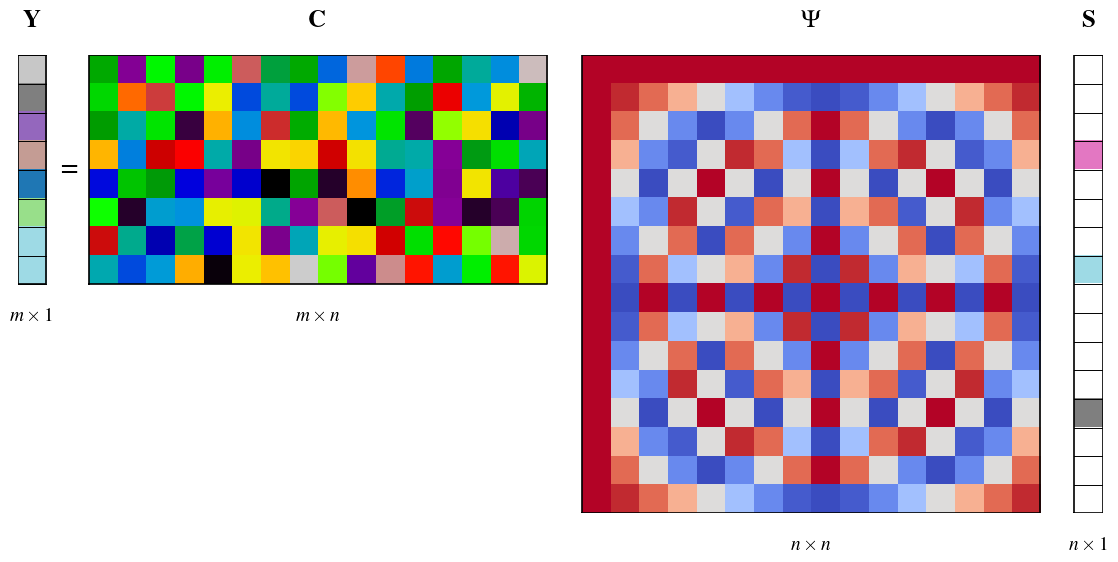

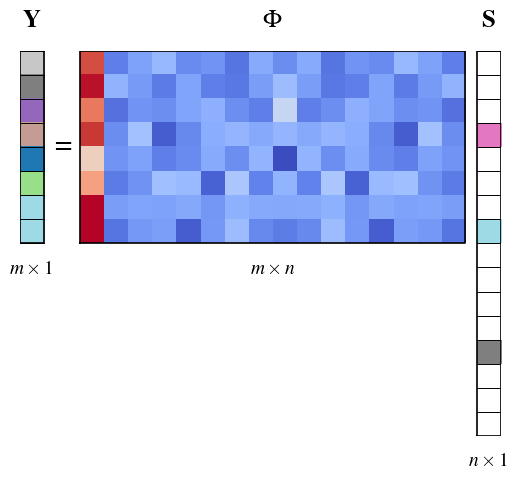

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colors as colors
import matplotlib as mpl

import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "mathtext.fontset": "cm",
    "axes.unicode_minus": False,
    "text.latex.preamble": r"\usepackage{amsmath}",  # <-- add this
})

# =========================================================
# Helper functions
# =========================================================
def sparse_cmap():
    """Colormap with white for zero entries."""
    cmap = plt.cm.tab20
    return mcolors.ListedColormap(["white"] + [cmap(i) for i in range(cmap.N)])

def plot_vector(ax, v, extent, label, shape_text, cmap="tab20", grid=True):
    """Draw a column vector with square cells."""
    n = len(v)
    ax.imshow(v.reshape(n, 1), cmap=cmap, extent=extent, aspect="auto")
    cx = (extent[0] + extent[1]) / 2
    ax.text(cx, extent[3] + 1, label, fontsize=18, ha="center")
    ax.text(cx, extent[2] - 1.2, shape_text, fontsize=14, ha="center")
    if grid:
        for i in range(n+1):
            ax.plot([extent[0], extent[1]], [extent[2] + i, extent[2] + i], color="black", lw=0.7)
    ax.plot([extent[0], extent[1], extent[1], extent[0], extent[0]],
            [extent[2], extent[2], extent[3], extent[3], extent[2]], color="black", lw=1.2)

def plot_matrix(ax, M, extent, label, shape_text, cmap="nipy_spectral", norm=None, draw=True):
    """Draw a matrix with borders."""
    if draw:
        ax.imshow(M, cmap=cmap, extent=extent, aspect="auto", norm=norm)
    cx = (extent[0] + extent[1]) / 2
    ax.text(cx, extent[3] + 1, label, fontsize=18, ha="center")
    ax.text(cx, extent[2] - 1.2, shape_text, fontsize=14, ha="center")
    ax.plot([extent[0], extent[1], extent[1], extent[0], extent[0]],
            [extent[2], extent[2], extent[3], extent[3], extent[2]], color="black", lw=1.2)

def plot_equals(ax, x, y):
    ax.text(x, y, "=", fontsize=22, ha="center", va="center")

# =========================================================
# Parameters
# =========================================================
m, n = 8, 16
Psi = np.fft.fft(np.eye(n)) / np.sqrt(n)   # Fourier basis
norm = colors.Normalize(vmin=-1/np.sqrt(n), vmax=1/np.sqrt(n))

# Signals
X_dense = np.arange(1, n + 1)
X_sparse = np.zeros(n); X_sparse[[3, 6, 12]] = [8, 5, 9]
S_sparse = np.zeros(n); S_sparse[[3, 7, 12]] = [5, 8, 6]

C = np.random.rand(m, n)
Y_sparse = C @ X_sparse
Y_dense = C @ X_dense
X_from_S = (Psi @ S_sparse).real
Y_chain = C @ X_from_S
Phi = C @ Psi
Y_combined = Phi @ S_sparse

# Template for Y (appearance should be consistent in figs 2,3,5,6,8)
Y_template = Y_dense  # choose dense version as canonical

# =========================================================
# 1. Y = C X (all empty)
# =========================================================
fig, ax = plt.subplots(figsize=(10, 5))
plot_vector(ax, np.zeros(m), [0, 1, n-m, n], r"$\mathbf{Y}$", r"$m \times 1$", cmap=sparse_cmap())
plot_equals(ax, 1.8, n-m/2)
plot_matrix(ax, np.zeros((m, n)), [2.5, 2.5 + n, n-m, n],
            r"$\mathbf{C}$", r"$m \times n$", draw=False)
plot_vector(ax, np.zeros(n), [3 + n, 3 + n + 1, 0, n],
            r"$\mathbf{X}$", r"$n \times 1$", cmap=sparse_cmap())
ax.axis("off"); ax.set_aspect("equal")
plt.savefig("CS-Empty.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# =========================================================
# 2. Y = C X (sparse X)
# =========================================================
fig, ax = plt.subplots(figsize=(10, 5))
plot_vector(ax, Y_template, [0, 1, n-m, n], r"$\mathbf{Y}$", r"$m \times 1$")
plot_equals(ax, 1.8, n-m/2)
plot_matrix(ax, C, [2.5, 2.5 + n, n-m, n],
            r"$\mathbf{C}$", r"$m \times n$")
plot_vector(ax, X_sparse, [3 + n, 3 + n + 1, 0, n],
            r"$\mathbf{X}$", r"$n \times 1$", cmap=sparse_cmap())
ax.axis("off"); ax.set_aspect("equal")
plt.savefig("CS-YCX-sparse.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# =========================================================
# 3. Y = C X (dense X)
# =========================================================
fig, ax = plt.subplots(figsize=(10, 5))
plot_vector(ax, Y_template, [0, 1, n-m, n], r"$\mathbf{Y}$", r"$m \times 1$")
plot_equals(ax, 1.8, n-m/2)
plot_matrix(ax, C, [2.5, 2.5 + n, n-m, n],
            r"$\mathbf{C}$", r"$m \times n$")
plot_vector(ax, X_dense, [3 + n, 3 + n + 1, 0, n],
            r"$\mathbf{X}$", r"$n \times 1$")
ax.axis("off"); ax.set_aspect("equal")
plt.savefig("CS-YCX-dense.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# =========================================================
# 4. X = Ψ S
# =========================================================
fig, ax = plt.subplots(figsize=(12, 6))
plot_vector(ax, X_dense, [0, 1, 0, n], r"$\mathbf{X}$", r"$n \times 1$")
plot_equals(ax, 1.8, n/2)
plot_matrix(ax, Psi.real, [2.5, 2.5 + n, 0, n],
            r"$\boldsymbol{\Psi}$", r"$n \times n$", cmap="coolwarm", norm=norm)
plot_vector(ax, S_sparse, [3 + n, 3 + n + 1, 0, n],
            r"$\mathbf{S}$", r"$n \times 1$", cmap=sparse_cmap())
ax.axis("off"); ax.set_aspect("equal")
plt.savefig("CS-XPSIS.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# =========================================================
# 6. Y = C Ψ S  (explicit fig, tighter spacing)
# =========================================================
fig, ax = plt.subplots(figsize=(14, 6))
plot_vector(ax, Y_template, [0, 1, n-m, n], r"$\mathbf{Y}$", r"$m \times 1$")
plot_equals(ax, 1.8, n-m/2)

# C matrix
plot_matrix(ax, C, [2.5, 2.5 + n, n-m, n],
            r"$\mathbf{C}$", r"$m \times n$")

# define a small consistent gap
gap = 1.2  

# Ψ matrix (close to C)
plot_matrix(ax, Psi.real, [2.5 + n + gap, 2.5 + n + gap + n, 0, n],
            r"$\boldsymbol{\Psi}$", r"$n \times n$", cmap="coolwarm", norm=norm)

# S vector (same small gap after Ψ)
plot_vector(ax, S_sparse, [2.5 + 2*n + 2*gap, 2.5 + 2*n + 2*gap + 1, 0, n],
            r"$\mathbf{S}$", r"$n \times 1$", cmap=sparse_cmap())

ax.axis("off"); ax.set_aspect("equal")
plt.savefig("CS-YCPSIS.pdf", bbox_inches="tight", pad_inches=0)
plt.show()


# =========================================================
# 8. Y = Φ S
# =========================================================
fig, ax = plt.subplots(figsize=(12, 5))
plot_vector(ax, Y_template, [0, 1, n-m, n], r"$\mathbf{Y}$", r"$m \times 1$")
plot_equals(ax, 1.8, n-m/2)
plot_matrix(ax, Phi.real, [2.5, 2.5 + n, n-m, n],
            r"$\boldsymbol{\Phi}$", r"$m \times n$", cmap="coolwarm")
plot_vector(ax, S_sparse, [3 + n, 3 + n + 1, 0, n],
            r"$\mathbf{S}$", r"$n \times 1$", cmap=sparse_cmap())
ax.axis("off"); ax.set_aspect("equal")
plt.savefig("CS-YPSIS.pdf", bbox_inches="tight", pad_inches=0)
plt.show()
